#  Определение частей речи с использованием рекуррентных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
* https://notebook.community/sameersingh/uci-statnlp/tutorials/rnn_examples
* https://github.com/bentrevett/pytorch-pos-tagging/blob/master/1_bilstm.ipynb
* https://github.com/Koziev/rupostagger

## Задачи для совместного разбора

1\. Рассмотрите пример работы двунаправленного рекуррентого слоя

![bi-lstm](https://discuss.pytorch.org/uploads/default/original/3X/d/3/d34a27c490e75c1a0a96128c5726ab6656427d90.jpeg)

In [ ]:
import torch as th
import torch.nn as nn

batch_size, seq_len, embedding_dim = 16, 10, 32
x = th.rand(batch_size, seq_len, embedding_dim)

In [ ]:
hidden_size = 50
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1, batch_first=True,
               bidirectional=False)

In [ ]:
o, (h, c) = lstm(x)
o.shape, h.shape, c.shape

(torch.Size([16, 10, 50]), torch.Size([1, 16, 50]), torch.Size([1, 16, 50]))

In [ ]:
hidden_size = 50
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1, batch_first=True,
               bidirectional=True)
o, (h, c) = lstm(x)
o.shape, h.shape, c.shape

(torch.Size([16, 10, 100]), torch.Size([2, 16, 50]), torch.Size([2, 16, 50]))

In [ ]:
h[0, 0, :]

tensor([ 0.2225,  0.0380, -0.1083, -0.0801, -0.2656,  0.0628,  0.0513,  0.0261,
         0.0650, -0.2690, -0.0823, -0.1691, -0.0364,  0.0298,  0.1987,  0.0539,
         0.0078,  0.0439, -0.1550,  0.0394,  0.1325, -0.1341, -0.1239, -0.0395,
        -0.1008, -0.0762, -0.2602, -0.1294,  0.2814, -0.1728,  0.0504, -0.0326,
        -0.0576,  0.0481,  0.1144,  0.1142, -0.0880,  0.0385, -0.1532,  0.1644,
        -0.1992, -0.1429, -0.1257, -0.0257,  0.0251,  0.0166, -0.1102, -0.0107,
        -0.0635, -0.0639], grad_fn=<SliceBackward0>)

In [ ]:
o[0, -1, :]

tensor([ 0.2225,  0.0380, -0.1083, -0.0801, -0.2656,  0.0628,  0.0513,  0.0261,
         0.0650, -0.2690, -0.0823, -0.1691, -0.0364,  0.0298,  0.1987,  0.0539,
         0.0078,  0.0439, -0.1550,  0.0394,  0.1325, -0.1341, -0.1239, -0.0395,
        -0.1008, -0.0762, -0.2602, -0.1294,  0.2814, -0.1728,  0.0504, -0.0326,
        -0.0576,  0.0481,  0.1144,  0.1142, -0.0880,  0.0385, -0.1532,  0.1644,
        -0.1992, -0.1429, -0.1257, -0.0257,  0.0251,  0.0166, -0.1102, -0.0107,
        -0.0635, -0.0639,  0.0138,  0.0328, -0.0247, -0.0680, -0.0009, -0.0775,
        -0.0399, -0.0193,  0.1641, -0.0661, -0.0777, -0.0233,  0.0852, -0.0320,
         0.1212, -0.1132,  0.0644,  0.0358, -0.0633,  0.0623, -0.1275,  0.1614,
        -0.0267,  0.0729, -0.1908, -0.0756,  0.0221, -0.0060,  0.0717, -0.0315,
         0.0130,  0.0021,  0.0933, -0.0013,  0.1029, -0.0976, -0.0168, -0.0674,
         0.1602, -0.0884,  0.1233, -0.0201,  0.0296, -0.0249,  0.0618,  0.1496,
         0.1203, -0.0267,  0.0224,  0.02

In [ ]:
h[1, 0, :]

tensor([-0.0161,  0.0278, -0.1103, -0.0657, -0.0256, -0.1899, -0.0180, -0.1376,
         0.2140, -0.0050, -0.0849, -0.0605,  0.0525,  0.0881,  0.1636, -0.1957,
         0.0535, -0.0374, -0.0842,  0.1017, -0.1624,  0.2005, -0.1486,  0.1752,
        -0.2804, -0.0627,  0.0134,  0.0231,  0.1931,  0.1072, -0.0324, -0.0635,
         0.1132,  0.0802,  0.0840, -0.1106, -0.0035, -0.0104,  0.2508, -0.1129,
         0.3782, -0.0840, -0.0715, -0.0103,  0.0409,  0.2694,  0.2118,  0.0100,
        -0.0968,  0.0260], grad_fn=<SliceBackward0>)

In [ ]:
o[0, 0, 50:]

tensor([-0.0161,  0.0278, -0.1103, -0.0657, -0.0256, -0.1899, -0.0180, -0.1376,
         0.2140, -0.0050, -0.0849, -0.0605,  0.0525,  0.0881,  0.1636, -0.1957,
         0.0535, -0.0374, -0.0842,  0.1017, -0.1624,  0.2005, -0.1486,  0.1752,
        -0.2804, -0.0627,  0.0134,  0.0231,  0.1931,  0.1072, -0.0324, -0.0635,
         0.1132,  0.0802,  0.0840, -0.1106, -0.0035, -0.0104,  0.2508, -0.1129,
         0.3782, -0.0840, -0.0715, -0.0103,  0.0409,  0.2694,  0.2118,  0.0100,
        -0.0968,  0.0260], grad_fn=<SliceBackward0>)

In [ ]:
n_pos = 5
fc = nn.Linear(2*hidden_size, n_pos)
fc(o).shape

torch.Size([16, 10, 5])

2\. Рассмотрите пример работы многоуровневого рекуррентого слоя

![stacked-rnn](https://lh6.googleusercontent.com/rC1DSgjlmobtRxMPFi14hkMdDqSkEkuOX7EW_QrLFSymjasIM95Za2Wf-VwSC1Tq1sjJlOPLJ92q7PTKJh2hjBoXQawM6MQC27east67GFDklTalljlt0cFLZnPMdhp8erzO)

In [ ]:
hidden_size = 50
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=2, batch_first=True,
               bidirectional=False)
o, (h, c) = lstm(x)
o.shape, h.shape, c.shape

(torch.Size([16, 10, 50]), torch.Size([2, 16, 50]), torch.Size([2, 16, 50]))

In [ ]:
o[0, -1]

tensor([-0.0595,  0.1203,  0.0415,  0.0843,  0.0398, -0.0573,  0.0359, -0.0064,
        -0.0939, -0.0174, -0.0269,  0.0084,  0.0922,  0.1270,  0.1053,  0.0923,
         0.0515,  0.0646,  0.0466, -0.0165,  0.0424,  0.0675,  0.0384,  0.0206,
         0.0702, -0.1011, -0.0541,  0.1278, -0.0989, -0.0476, -0.0126,  0.0290,
         0.1350,  0.0322,  0.0668, -0.0722,  0.0203,  0.0684,  0.0258, -0.1315,
         0.0078,  0.0041, -0.0020,  0.0292, -0.0099, -0.0077, -0.0392, -0.0202,
         0.0134,  0.1454], grad_fn=<SelectBackward0>)

In [ ]:
h[1, 0]

tensor([-0.0595,  0.1203,  0.0415,  0.0843,  0.0398, -0.0573,  0.0359, -0.0064,
        -0.0939, -0.0174, -0.0269,  0.0084,  0.0922,  0.1270,  0.1053,  0.0923,
         0.0515,  0.0646,  0.0466, -0.0165,  0.0424,  0.0675,  0.0384,  0.0206,
         0.0702, -0.1011, -0.0541,  0.1278, -0.0989, -0.0476, -0.0126,  0.0290,
         0.1350,  0.0322,  0.0668, -0.0722,  0.0203,  0.0684,  0.0258, -0.1315,
         0.0078,  0.0041, -0.0020,  0.0292, -0.0099, -0.0077, -0.0392, -0.0202,
         0.0134,  0.1454], grad_fn=<SelectBackward0>)

In [ ]:
hidden_size = 50
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=2, batch_first=True,
               bidirectional=True)
o, (h, c) = lstm(x)
o.shape, h.shape, c.shape

(torch.Size([16, 10, 100]), torch.Size([4, 16, 50]), torch.Size([4, 16, 50]))

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Считайте файл `pos_data.txt` и создайте на его основе два списка `X` и `y` следующего вида.

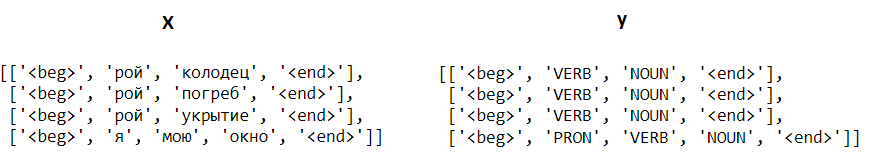

Найдите 75% квантиль распределения длин предложений и удалите из выборки те предложения, которые длиннее данного значения. Выведите на экран пару `(X[0], y[0])` и количество элементов в `X` и `y`.

- [ ] Проверено на семинаре

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [ ]:
delimiter = '|'

words = []
speech = []

start = '<beg>'
end = '<end>'

idx_w = []
idx_s = []



with open('/kaggle/input/lab10-nlp/pos_data.txt', 'r') as f:
    f = f.readlines()
    for row in f:
        row = row.split()
        #print(row)
        if row:
            if len(row) == 2:
                continue
            elif len(row) > 3:  # '8	саудовскую аравию	NOUN|Case=Acc|Gender=Fem|Number=Sing'
                row = [row[0], row[1:-1], row[-1]]
            if row[1] == start:
                idx_w = [row[1]]
                idx_s = [row[1]]
            elif row[1] == end:
                idx_w += [row[1]]
                words.append(idx_w)

                idx_s += [row[1]]
                speech.append(idx_s)
            else:
                if type(row[1]) != list:
                    idx_w += [row[1]]
                    idx_s +=[row[2].split(delimiter)[0]]
                else:
                    idx_w += [*row[1]]
                    idx_s +=[row[2].split(delimiter)[0]]* len(row[1])



In [ ]:
a = [1, 2, 3]
a += ['a']*len(a)
a

[1, 2, 3, 'a', 'a', 'a']

In [ ]:
len(words), len(speech)

(990066, 990066)

In [ ]:
words[0], speech[0]

(['<beg>', 'рой', 'колодец', '<end>'], ['<beg>', 'VERB', 'NOUN', '<end>'])

In [ ]:
lens = [len(i) for i in words]

In [ ]:
max(lens)

472

In [ ]:
q = torch.quantile(torch.tensor(lens, dtype=torch.float32), 0.75)
q

tensor(12.)

In [ ]:
words = [sent for sent in words if len(sent) <= 12]
speech = [sent for sent in speech if len(sent) <= 12]


In [ ]:
len(words), len(speech)

(771775, 771775)

<p class="task" id="2"></p>

2\. Разделите данные на обучающую и тестовую выборку. Создайте два Vocab на основе загруженных данных: `vocab_X` для слов и `vocab_y` для частей речи. Добавьте в словари специальные токены `<PAD>`, `<UNK>`, `<beg>`, `<end>`. Выведите на экран количество токенов в полученных словарях.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(words, speech, train_size=0.8)

In [ ]:
special = '<PAD>, <UNK>, <beg>, <end>'

In [ ]:
vocab_X = dict()
vocab_y = dict()

In [ ]:
for idx, x in enumerate(special.split(', ')):
    vocab_X[x] = idx
    vocab_y[x] = idx


In [ ]:
vocab_X, len(vocab_X)

({'<PAD>': 0, '<UNK>': 1, '<beg>': 2, '<end>': 3}, 4)

In [ ]:
[1, 2, 3, 4, 5][1:-1]

[2, 3, 4]

In [ ]:
for sent in X_train:
    for word in sent[1:-1]:
        vocab_X[word] = vocab_X.get(word, len(vocab_X))

In [ ]:
len(vocab_X)

210458

In [ ]:
for sent in y_train:
    for word in sent[1:-1]:
        vocab_y[word] = vocab_y.get(word, len(vocab_y))

In [ ]:
len(vocab_y)

20

In [ ]:
vocab_y

{'<PAD>': 0,
 '<UNK>': 1,
 '<beg>': 2,
 '<end>': 3,
 'ADV': 4,
 'ADJ': 5,
 'VERB': 6,
 'NOUN': 7,
 'PUNCT': 8,
 'PRON': 9,
 'CONJ': 10,
 'ADP': 11,
 'PART': 12,
 'X': 13,
 'NUM': 14,
 'LATN': 15,
 'H': 16,
 'SYM': 17,
 'INTJ': 18,
 'DET': 19}

<p class="task" id="3"></p>

3\. Создайте класс `POSTaggingDataset`. Реализуйте `__getitem__` таким образом, чтобы он возвращал кортеж `(x, y)`, где x - это набор индексов токенов для предложений на русском языке, а `y` - набор индексов токенов для соответствующих частей речи. Используя преобразования, сделайте длины наборов индексов одинаковой фиксированной длины. Создайте два датасета: для обучающей и тестовой выборки.

Выведите на экран формы тензоров `x` и `y`:

```python
x, y = train_dset[:5]
print(x.shape, y.shape)
```



- [ ] Проверено на семинаре

In [ ]:
vocab_X.get('мама', 1)

116

In [ ]:
from torch.utils.data import Dataset


class POSTaggingDataset(Dataset):
    def __init__(self, vocab_X, vocab_y, X, y, max_len):
        self.X = []
        for sent in X:
            tokens = [vocab_X.get(i, 1) for i in sent]   # vocab_X.get(i, 1), 1 = unk
            if len(tokens) < max_len:
                tokens += [0] * (max_len - len(tokens))  # 0 = pad
            self.X.append(tokens)

        self.y = []
        for sent in y:
            tokens = [vocab_y.get(i, 1) for i in sent]   # vocab_y.get(i, 1), 1 = unk
            if len(tokens) < max_len:
                tokens += [0] * (max_len - len(tokens))  # 0 = pad
            self.y.append(tokens)

    def __len__(self):
        return len(self.X)


    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.long), torch.tensor(self.y[idx], dtype=torch.long)


In [ ]:
lens = [len(i) for i in X_train]
max(lens)

12

In [ ]:
train_dataset = POSTaggingDataset(vocab_X=vocab_X, vocab_y=vocab_y, X=X_train, y=y_train, max_len=12)
test_dataset = POSTaggingDataset(vocab_X=vocab_X, vocab_y=vocab_y, X=X_test, y=y_test, max_len=12)

In [ ]:
x, y = train_dataset[:5]
print(x.shape, y.shape)

torch.Size([5, 12]) torch.Size([5, 12])


In [ ]:
x

tensor([[ 2,  4,  5,  6,  7,  3,  0,  0,  0,  0,  0,  0],
        [ 2,  8,  9, 10, 11,  3,  0,  0,  0,  0,  0,  0],
        [ 2, 12, 13, 11,  3,  0,  0,  0,  0,  0,  0,  0],
        [ 2, 14, 15, 16, 17, 18,  3,  0,  0,  0,  0,  0],
        [ 2, 12, 19, 20, 21, 22,  3,  0,  0,  0,  0,  0]])

In [ ]:
y

tensor([[ 2,  4,  5,  6,  4,  3,  0,  0,  0,  0,  0,  0],
        [ 2,  5,  7,  6,  8,  3,  0,  0,  0,  0,  0,  0],
        [ 2,  9,  6,  8,  3,  0,  0,  0,  0,  0,  0,  0],
        [ 2, 10,  9,  6,  9,  4,  3,  0,  0,  0,  0,  0],
        [ 2,  9,  6, 11,  9,  7,  3,  0,  0,  0,  0,  0]])

<p class="task" id="4"></p>

4\. Создайте и обучите модель для предсказания частей речи. Игнорируйте токен `<PAD>` при расчете ошибки. Во время обучения выводите на экран значения функции потерь для эпохи, значение accuracy для эпохи.

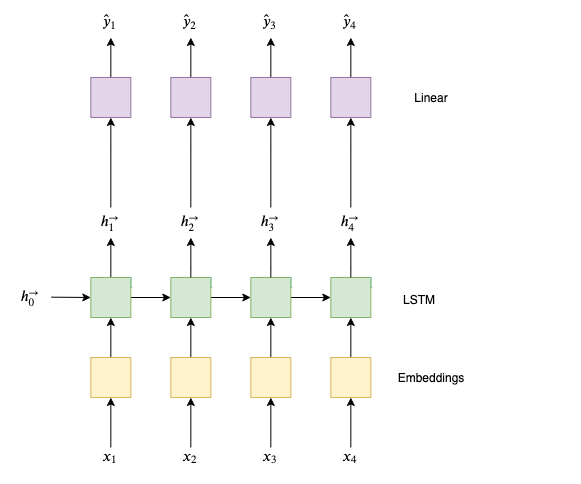

- [ ] Проверено на семинаре

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class POSTaggingModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_classes, pad_idx=0):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)

        self.rnn = nn.LSTM(input_size=embed_dim, hidden_size=hidden_size, batch_first=True)

        self.fc1 = nn.Linear(hidden_size, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, num_classes)


    def forward(self, x):
        embedded = self.embedding(x)
        outputs, (h, c) = self.rnn(embedded)
        logits = self.fc3(F.relu(self.fc2(F.relu(self.fc1(outputs))))) # вводим o потому что нужны токены каждого слова
        return logits

In [ ]:
vocab_size = len(vocab_X)
embed_dim = 200
hidden_size = 256

In [ ]:
model = POSTaggingModel(vocab_size, embed_dim, hidden_size, len(vocab_y))
model = model.to(device)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
train_losses = []
train_accuracies, test_accuracies = [], []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
    for x_batch, y_batch in loop:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()

        logits = model(x_batch)  # [batch, seq_len, num_classes]
        loss = criterion(logits.view(-1, logits.shape[-1]), y_batch.view(-1))  # [batch * seq_len, num_classes] vs [batch * seq_len]

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)  # [batch, seq_len]

        mask = y_batch != 0  # паддинг маска
        all_preds.extend(preds[mask].detach().cpu().numpy().tolist())
        all_labels.extend(y_batch[mask].detach().cpu().numpy().tolist())

        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    acc_train = accuracy_score(all_labels, all_preds)

    train_losses.append(avg_loss)
    train_accuracies.append(acc_train)


    model.eval()
    test_preds, test_labels = [], []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            logits = model(x_batch)  # [batch, seq_len, num_classes]
            preds = torch.argmax(logits, dim=-1)  # [batch, seq_len]

            mask = y_batch != 0
            test_preds.extend(preds[mask].detach().cpu().numpy().tolist()) # убираю падинг и отключаю авто вычисление градиентов (detach)
            test_labels.extend(y_batch[mask].detach().cpu().numpy().tolist())

    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracies.append(acc_test)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} "
          f"| Acc Train: {acc_train:.4f} | Acc Test: {acc_test:.4f}")


Epoch 1/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 1/10 | Loss: 0.0979 | Acc Train: 0.9665 | Acc Test: 0.9654


Epoch 2/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 2/10 | Loss: 0.0744 | Acc Train: 0.9748 | Acc Test: 0.9676


Epoch 3/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 3/10 | Loss: 0.0631 | Acc Train: 0.9787 | Acc Test: 0.9698


Epoch 4/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 4/10 | Loss: 0.0566 | Acc Train: 0.9808 | Acc Test: 0.9692


Epoch 5/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 5/10 | Loss: 0.0526 | Acc Train: 0.9820 | Acc Test: 0.9713


Epoch 6/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 6/10 | Loss: 0.0502 | Acc Train: 0.9828 | Acc Test: 0.9695


Epoch 7/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 7/10 | Loss: 0.0489 | Acc Train: 0.9831 | Acc Test: 0.9715


Epoch 8/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 8/10 | Loss: 0.0481 | Acc Train: 0.9833 | Acc Test: 0.9713


Epoch 9/10:   0%|          | 0/9648 [00:00<?, ?it/s]

In [ ]:
tokens_y = {token: word for word, token in vocab_y.items() if token not in [0, 1]}
tokens_y

{2: '<beg>',
 3: '<end>',
 4: 'ADV',
 5: 'ADJ',
 6: 'VERB',
 7: 'NOUN',
 8: 'PUNCT',
 9: 'PRON',
 10: 'CONJ',
 11: 'ADP',
 12: 'PART',
 13: 'X',
 14: 'NUM',
 15: 'LATN',
 16: 'H',
 17: 'SYM',
 18: 'INTJ',
 19: 'DET'}

1042128

<p class="task" id="5"></p>

5\. Постройте и выведите на экран classification report на основе тестовой выборки. Выведите на экран пример предсказания частей речи обученной моделью.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.metrics import classification_report


idx2tag = {idx: tag for tag, idx in vocab_y.items()}


tag_names = [idx2tag[i] for i in sorted(idx2tag) if i > 1]
tag_indices = list(range(2, len(idx2tag)))


print("Classification Report:")
print(classification_report(test_labels, test_preds, labels=tag_indices, target_names=tag_names))


Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <beg>       1.00      1.00      1.00    132288
       <end>       1.00      1.00      1.00    132288
         ADV       0.93      0.93      0.93     50297
         ADJ       0.97      0.88      0.92     78283
        VERB       0.99      0.96      0.98    147957
        NOUN       0.93      0.99      0.96    170679
       PUNCT       1.00      1.00      1.00    148547
        PRON       0.95      0.98      0.96     73546
        CONJ       0.87      0.93      0.90     25001
         ADP       0.97      1.00      0.98     52698
        PART       0.95      0.83      0.88     22663
           X       0.51      0.27      0.35       964
         NUM       0.99      0.87      0.93      5385
        LATN       0.62      0.69      0.65       465
           H       0.50      0.10      0.17       396
         SYM       0.67      0.89      0.76        18
        INTJ       0.84      0.34      0.48       302
         DET       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
idx2word = {idx: word for word, idx in vocab_X.items()}


model.eval()
with torch.no_grad():
    for x_sample, y_sample in test_loader:
        x_sample, y_sample = x_sample[0:1].to(device), y_sample[0:1].to(device)
        logits = model(x_sample)
        preds = torch.argmax(logits, dim=-1)
        break


x_tokens = [idx2word.get(idx.item(), "<UNK>") for idx in x_sample[0] if idx.item() != 0]
y_true_tags = [idx2tag.get(idx.item(), "<UNK>") for idx in y_sample[0] if idx.item() != 0]
y_pred_tags = [idx2tag.get(idx.item(), "<UNK>") for idx in preds[0] if idx.item() != 0]


print(f"{'word':15} | {'true':15} | {'pred'}")
print('-------------------------------------------')
for token, true_tag, pred_tag in zip(x_tokens, y_true_tags, y_pred_tags):
    print(f"{token:15} | {true_tag:15} | {pred_tag}")

word            | true            | pred
-------------------------------------------
<beg>           | <beg>           | <beg>
кругом          | ADV             | ADV
лежали          | VERB            | VERB
трупы           | NOUN            | NOUN
.               | PUNCT           | PUNCT
<end>           | <end>           | <end>


<p class="task" id="6"></p>

6\. Решите задачи 4-5, используя двунаправленный рекуррентный слой.

- [ ] Проверено на семинаре

In [ ]:
class POSTaggingModel2(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_classes, pad_idx=0):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)

        self.rnn = nn.LSTM(input_size=embed_dim, hidden_size=hidden_size, batch_first=True, bidirectional=True)

        self.fc1 = nn.Linear(hidden_size*2, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, num_classes)


    def forward(self, x):
        embedded = self.embedding(x)
        outputs, (h, c) = self.rnn(embedded)
        logits = self.fc3(F.relu(self.fc2(F.relu(self.fc1(outputs))))) # вводим o потому что нужны токены каждого слова
        return logits

In [ ]:
model = POSTaggingModel2(vocab_size, embed_dim, hidden_size, len(vocab_y))
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
train_losses = []
train_accuracies, test_accuracies = [], []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
    for x_batch, y_batch in loop:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()

        logits = model(x_batch)  # [batch, seq_len, num_classes]
        loss = criterion(logits.view(-1, logits.shape[-1]), y_batch.view(-1))  # [batch * seq_len, num_classes] vs [batch * seq_len]

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.argmax(logits, dim=-1)  # [batch, seq_len]

        mask = y_batch != 0  # паддинг маска
        all_preds.extend(preds[mask].detach().cpu().numpy().tolist())
        all_labels.extend(y_batch[mask].detach().cpu().numpy().tolist())

        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    acc_train = accuracy_score(all_labels, all_preds)

    train_losses.append(avg_loss)
    train_accuracies.append(acc_train)


    model.eval()
    test_preds, test_labels = [], []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            logits = model(x_batch)  # [batch, seq_len, num_classes]
            preds = torch.argmax(logits, dim=-1)  # [batch, seq_len]

            mask = y_batch != 0
            test_preds.extend(preds[mask].detach().cpu().numpy().tolist()) # убираю падинг и отключаю авто вычисление градиентов (detach)
            test_labels.extend(y_batch[mask].detach().cpu().numpy().tolist())

    acc_test = accuracy_score(test_labels, test_preds)
    test_accuracies.append(acc_test)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} "
          f"| Acc Train: {acc_train:.4f} | Acc Test: {acc_test:.4f}")


Epoch 1/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 1/10 | Loss: 0.2075 | Acc Train: 0.9268 | Acc Test: 0.9567


Epoch 2/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 2/10 | Loss: 0.0938 | Acc Train: 0.9679 | Acc Test: 0.9643


Epoch 3/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 3/10 | Loss: 0.0707 | Acc Train: 0.9761 | Acc Test: 0.9681


Epoch 4/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 4/10 | Loss: 0.0598 | Acc Train: 0.9798 | Acc Test: 0.9702


Epoch 5/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 5/10 | Loss: 0.0536 | Acc Train: 0.9817 | Acc Test: 0.9696


Epoch 6/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 6/10 | Loss: 0.0504 | Acc Train: 0.9827 | Acc Test: 0.9675


Epoch 7/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 7/10 | Loss: 0.0487 | Acc Train: 0.9831 | Acc Test: 0.9683


Epoch 8/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 8/10 | Loss: 0.0478 | Acc Train: 0.9834 | Acc Test: 0.9665


Epoch 9/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 9/10 | Loss: 0.0473 | Acc Train: 0.9835 | Acc Test: 0.9639


Epoch 10/10:   0%|          | 0/9648 [00:00<?, ?it/s]

Epoch 10/10 | Loss: 0.0468 | Acc Train: 0.9836 | Acc Test: 0.9677


In [ ]:
tag_names = [idx2tag[i] for i in sorted(idx2tag) if i > 1]
tag_indices = list(range(2, len(idx2tag)))


print("Classification Report:")
print(classification_report(test_labels, test_preds, labels=tag_indices, target_names=tag_names))


Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <beg>       1.00      1.00      1.00    154355
       <end>       1.00      1.00      1.00    154355
         ADV       0.93      0.93      0.93     58907
         ADJ       0.93      0.90      0.91     91169
        VERB       0.99      0.96      0.98    172628
        NOUN       0.97      0.96      0.97    199037
       PUNCT       1.00      1.00      1.00    173111
        PRON       0.96      0.98      0.97     85867
        CONJ       0.86      0.94      0.90     29148
         ADP       0.98      0.99      0.98     61537
        PART       0.94      0.83      0.88     26432
           X       0.06      0.41      0.10      1122
         NUM       0.61      0.88      0.72      6323
        LATN       0.78      0.66      0.72       557
           H       0.41      0.10      0.16       452
         SYM       0.68      0.86      0.76        22
        INTJ       0.57      0.35      0.43       341
         DET       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.eval()
k = 0
with torch.no_grad():
    for x_sample, y_sample in test_loader:
        x_sample, y_sample = x_sample[0:1].to(device), y_sample[0:1].to(device)
        logits = model(x_sample)
        preds = torch.argmax(logits, dim=-1)
        k +=1
        if k > 3:
            break


x_tokens = [idx2word.get(idx.item(), "<UNK>") for idx in x_sample[0] if idx.item() != 0]
y_true_tags = [idx2tag.get(idx.item(), "<UNK>") for idx in y_sample[0] if idx.item() != 0]
y_pred_tags = [idx2tag.get(idx.item(), "<UNK>") for idx in preds[0] if idx.item() != 0]


print(f"{'word':15} | {'true':15} | {'pred'}")
print('-------------------------------------------')
for token, true_tag, pred_tag in zip(x_tokens, y_true_tags, y_pred_tags):
    print(f"{token:15} | {true_tag:15} | {pred_tag}")

word            | true            | pred
-------------------------------------------
<beg>           | <beg>           | <beg>
внезапно        | ADV             | ADV
все             | ADJ             | ADJ
трое            | NUM             | NUM
очутились       | VERB            | VERB
на              | ADP             | ADP
краю            | NOUN            | NOUN
отчаяния        | NOUN            | NOUN
.               | PUNCT           | PUNCT
<end>           | <end>           | <end>
